Diabetes Prediction

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import scipy.stats as stats

In [8]:
from sklearn.svm import SVC

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.metrics import roc_curve, auc

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

Data Input

In [17]:
df=pd.read_csv(r'C:\Users\ts280\Documents\GitHub\Machine-Learning\DataSets\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df = df.drop(["SkinThickness"], axis=1, errors="ignore")

In [22]:
df.shape

(768, 8)

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

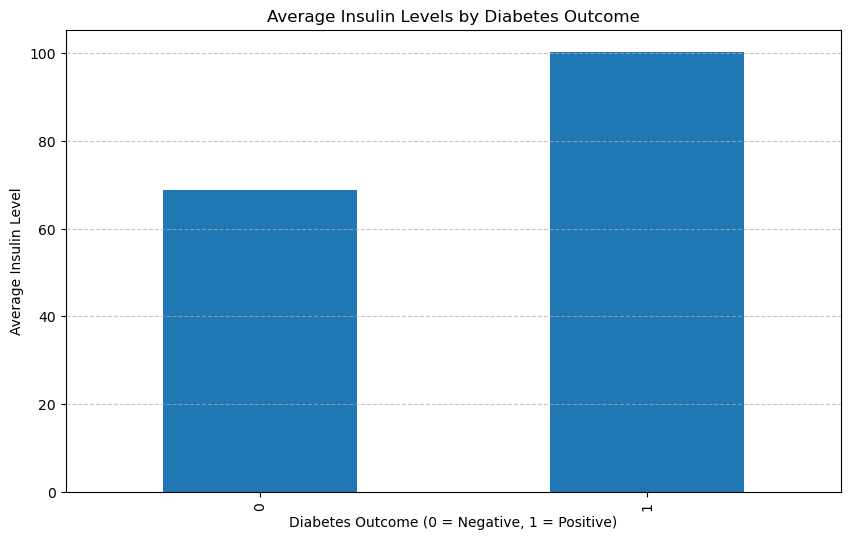

In [24]:
# Create a bar plot
plt.figure(figsize=(10, 6))
df.groupby('Outcome')['Insulin'].mean().plot(kind='bar')

# Customize the plot
plt.title('Average Insulin Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Average Insulin Level')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

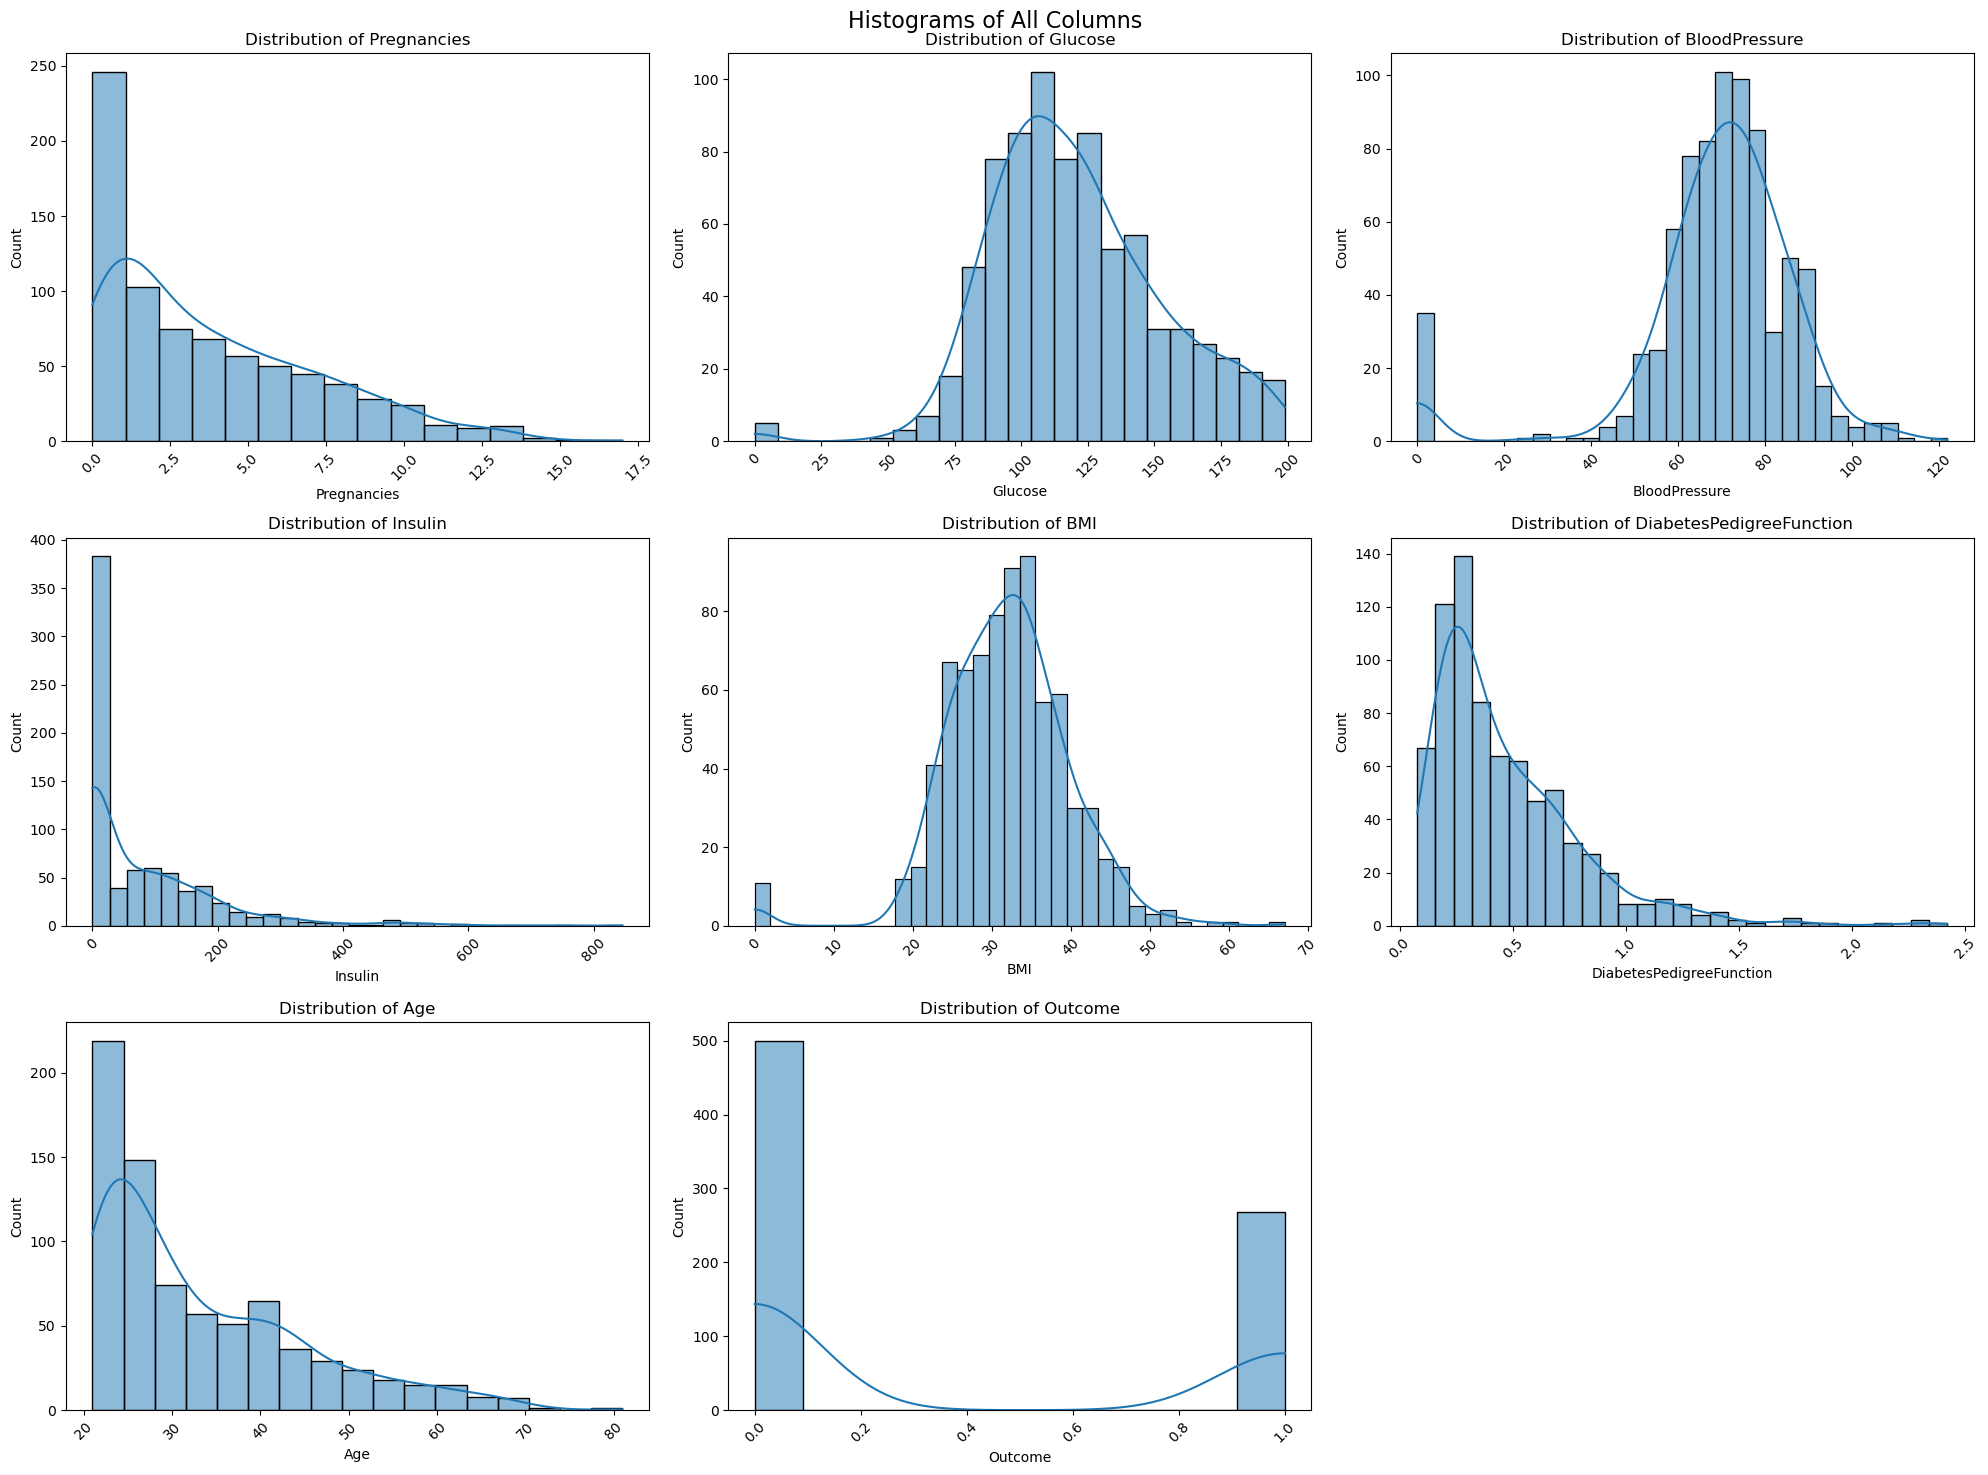

In [25]:
# Get number of columns
num_cols = len(df.columns)

# Calculate rows needed (3 plots per row)
num_rows = (num_cols + 2) // 3

# Create subplot figure
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 15))
fig.suptitle('Histograms of All Columns', fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histogram for each column
for idx, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    else:
        sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove any extra subplots
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


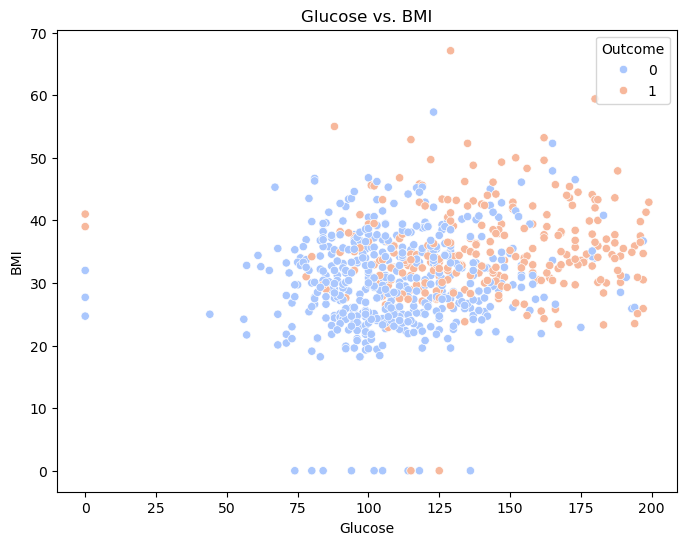

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm")
plt.title("Glucose vs. BMI")
plt.show()


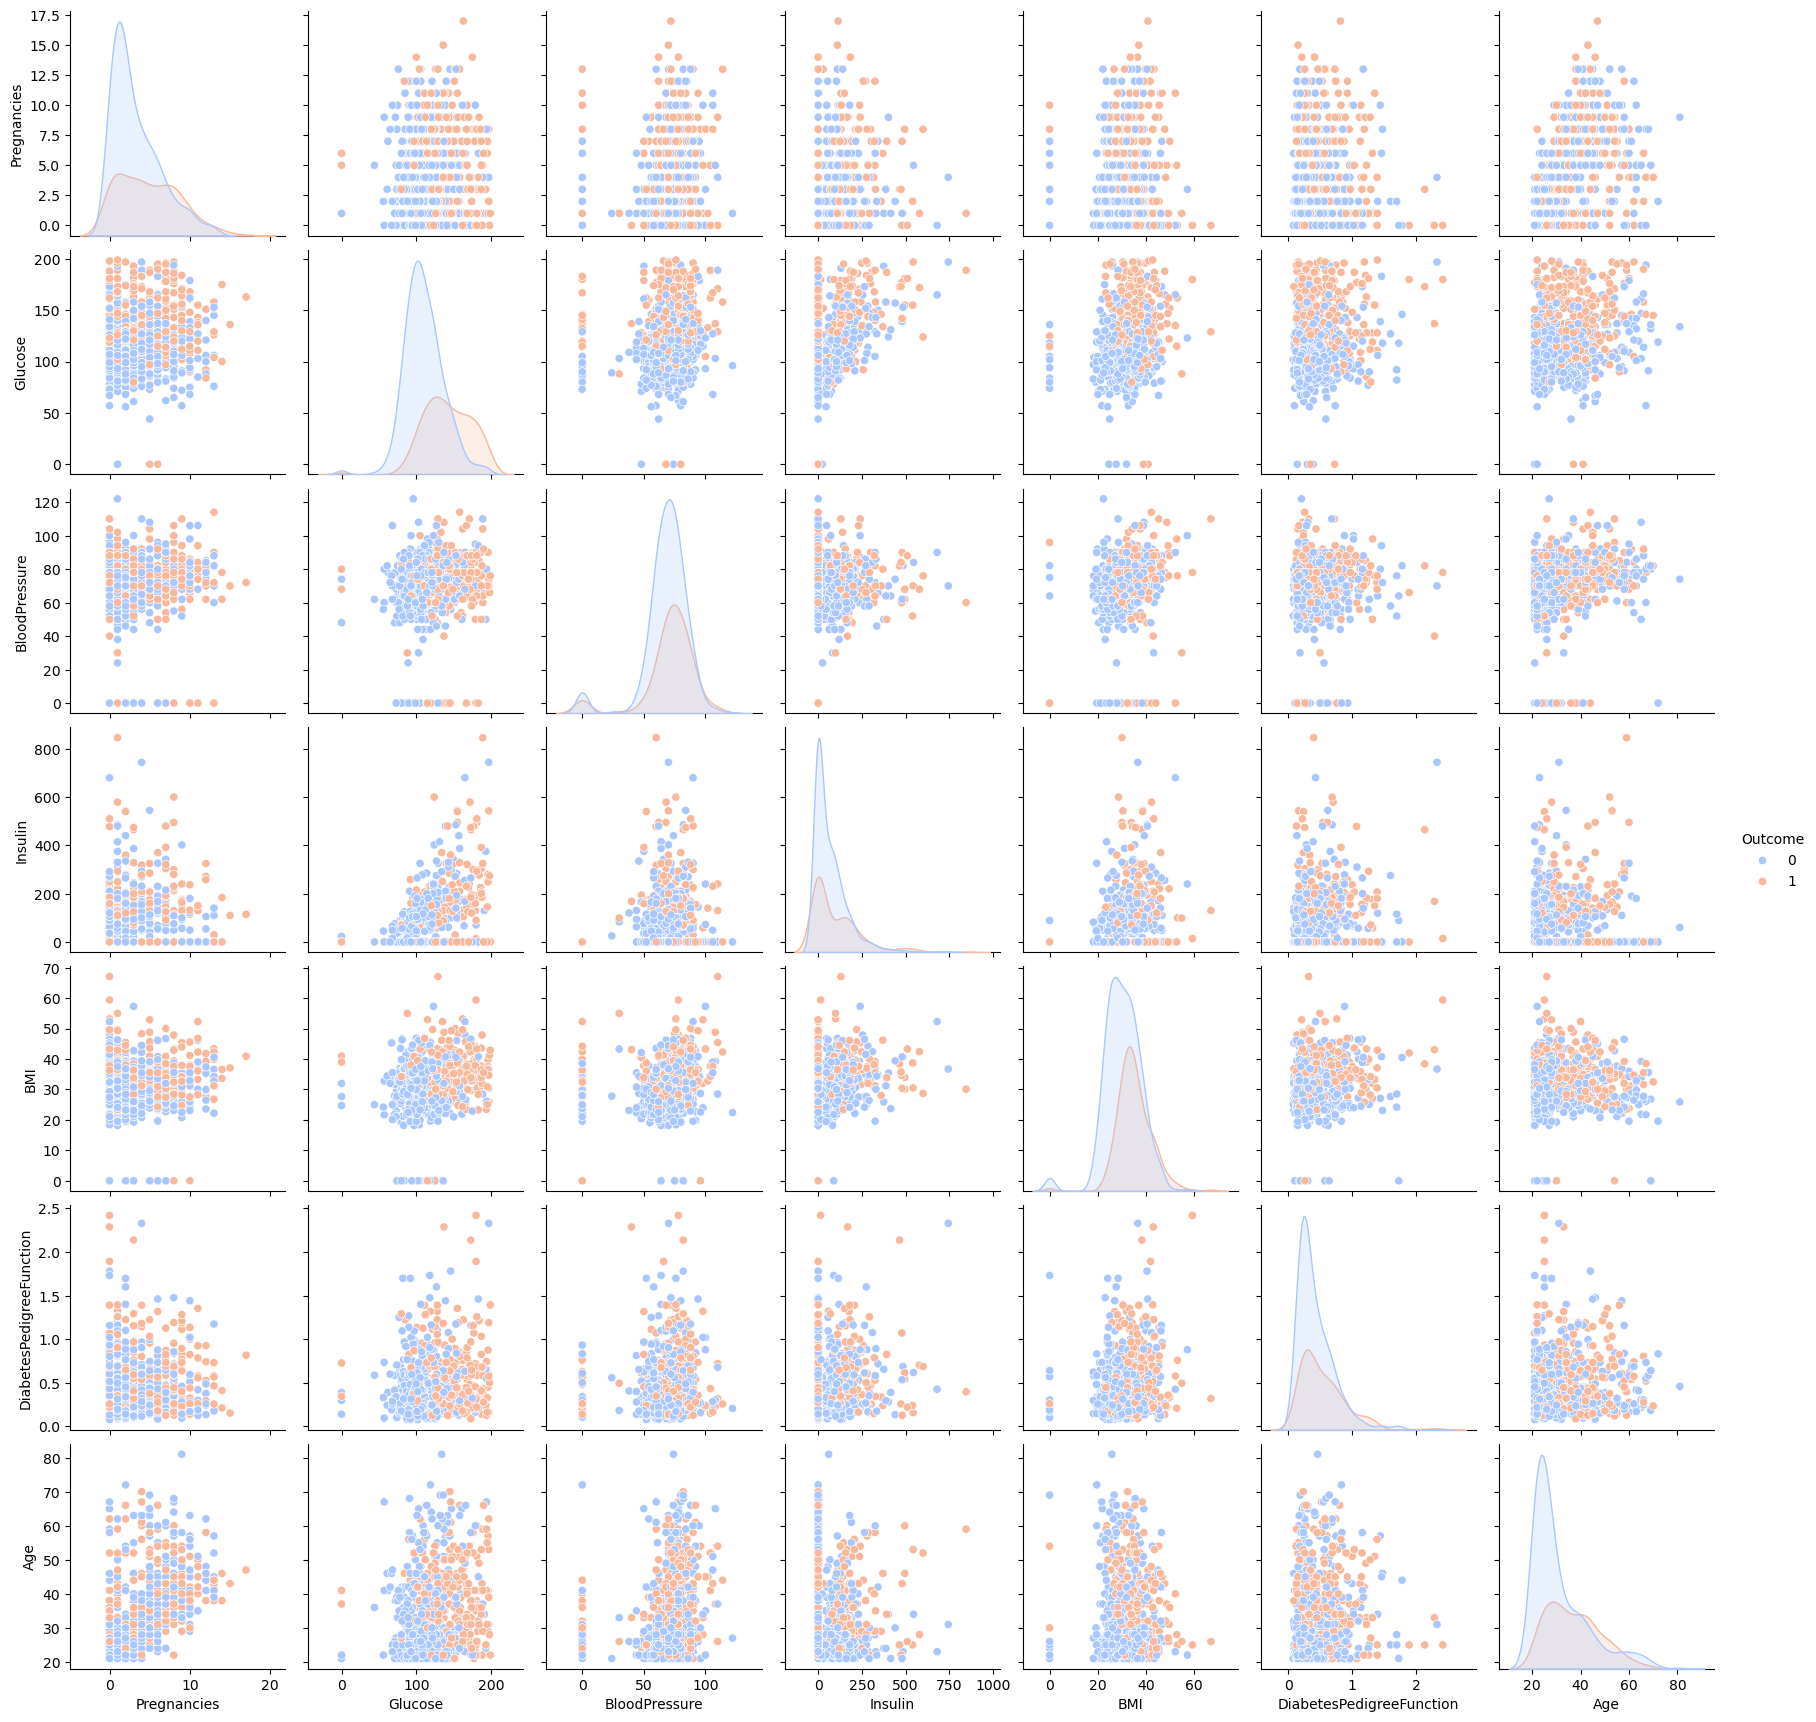

In [27]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="coolwarm")
plt.show()

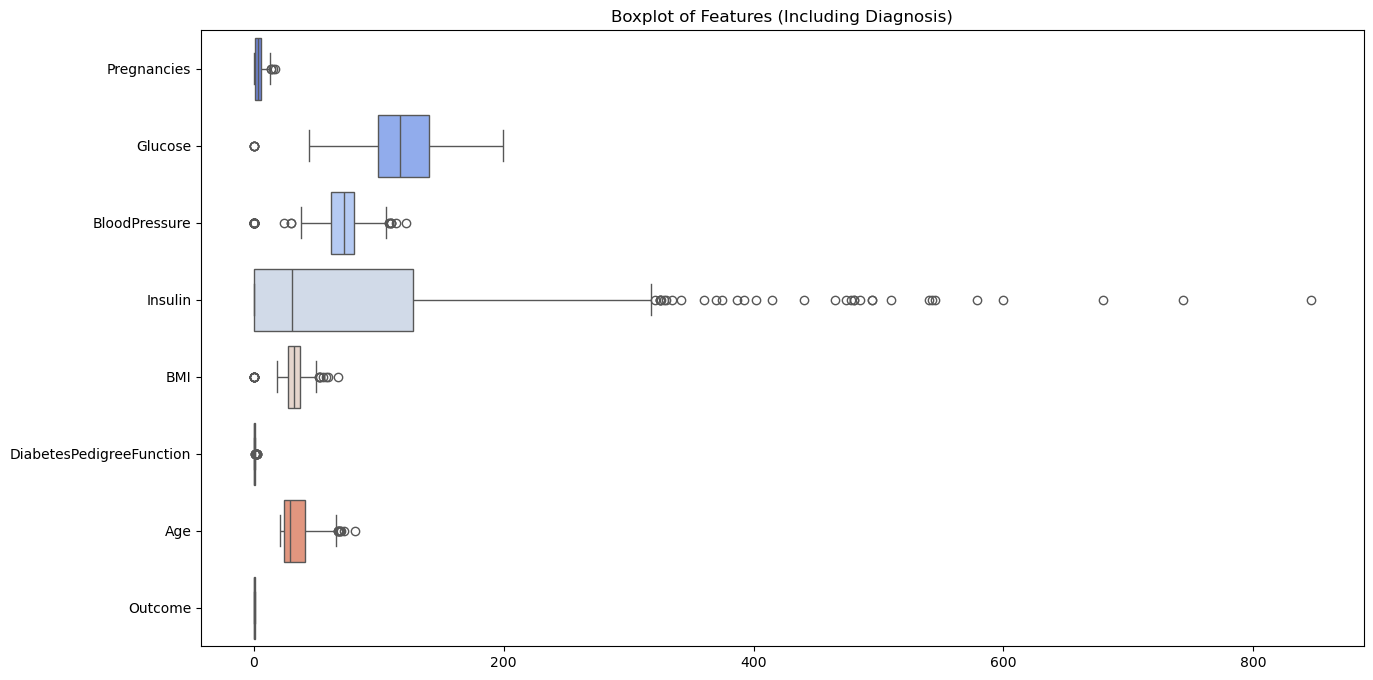

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Boxplot of Features (Including Diagnosis)")
plt.show()

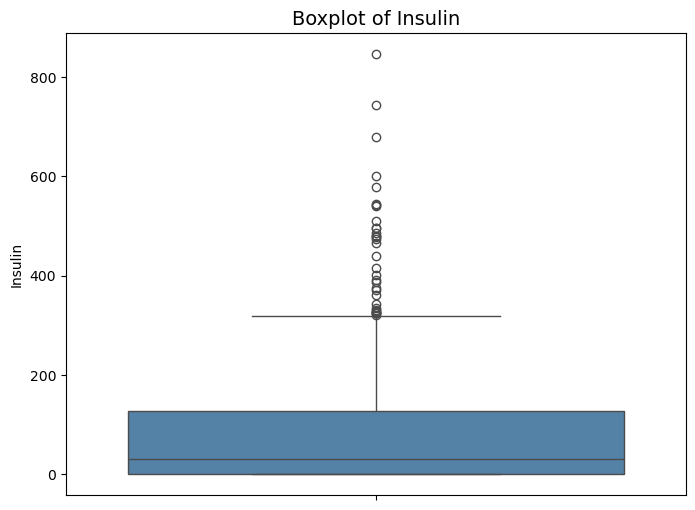

In [29]:
plt.figure(figsize=(8, 6))

# Create a boxplot for 'area_mean'
sns.boxplot(y=df["Insulin"], color="steelblue")

# Add title
plt.title("Boxplot of Insulin", fontsize=14)

# Show the plot
plt.show()


In [30]:
Q1 = df["Insulin"].quantile(0.25)
Q3 = df["Insulin"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers and update new_df
new_df = df[(df["Insulin"] >= lower_bound) & (df["Insulin"] <= upper_bound)].copy()

# Print dataset shape before and after processing
print(f"Original Dataset Shape: {df.shape}")
print(f"Processed Dataset Shape (After Removing Outliers from Insulin): {new_df.shape}")


Original Dataset Shape: (768, 8)
Processed Dataset Shape (After Removing Outliers from Insulin): (734, 8)


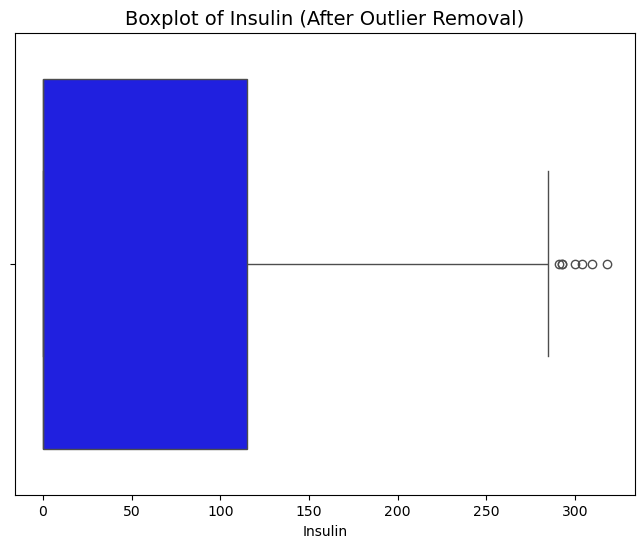

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for 'area_mean' in the cleaned dataset
sns.boxplot(x=new_df["Insulin"], color="blue")

# Add title
plt.title("Boxplot of Insulin (After Outlier Removal)", fontsize=14)

# Show the plot
plt.show()

In [32]:
Q1 = new_df["Insulin"].quantile(0.25)
Q3 = new_df["Insulin"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers and update new_df
new_df2 =new_df[(new_df["Insulin"] >= lower_bound) & (new_df["Insulin"] <= upper_bound)].copy()

# Print dataset shape before and after processing
print(f"Original Dataset Shape: {new_df.shape}")
print(f"Processed Dataset Shape (After Removing Outliers from Insulin): {new_df2.shape}")


Original Dataset Shape: (734, 8)
Processed Dataset Shape (After Removing Outliers from Insulin): (727, 8)


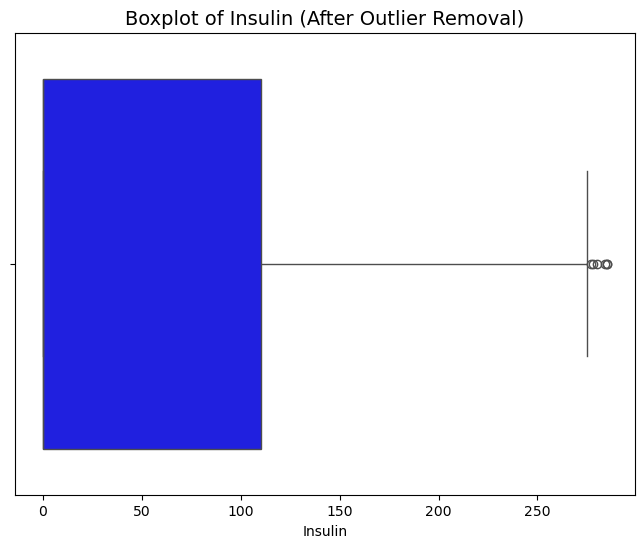

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for 'area_mean' in the cleaned dataset
sns.boxplot(x=new_df2["Insulin"], color="blue")

# Add title
plt.title("Boxplot of Insulin (After Outlier Removal)", fontsize=14)

# Show the plot
plt.show()

SVM

In [35]:
# Split the data into features and target
X = new_df2.drop(columns=["Outcome"])
y = new_df2["Outcome"]

# Split into training and testing sets (70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an optimized SVM model
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        97
           1       0.65      0.73      0.69        49

    accuracy                           0.78       146
   macro avg       0.76      0.77      0.76       146
weighted avg       0.79      0.78      0.78       146



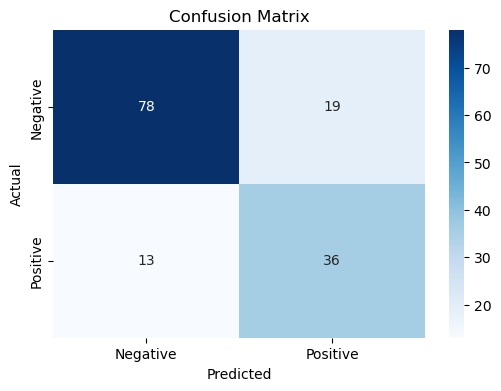

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

KNN

In [38]:
# Split the data into features and target
X = new_df2.drop(columns=["Outcome"])
y = new_df2["Outcome"]

# Split into training and testing sets (70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data for better KNN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       145
           1       0.70      0.51      0.59        74

    accuracy                           0.76       219
   macro avg       0.74      0.70      0.71       219
weighted avg       0.76      0.76      0.75       219



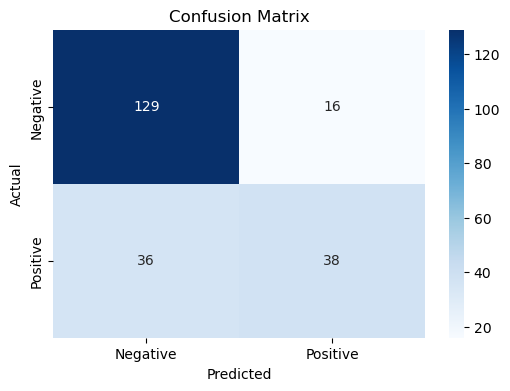

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Random Forest

In [41]:
# Split the data into features and target
X = new_df2.drop(columns=["Outcome"])
y = new_df2["Outcome"]

# Split into training and testing sets (70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.74      0.63      0.68        49

    accuracy                           0.80       146
   macro avg       0.78      0.76      0.77       146
weighted avg       0.80      0.80      0.80       146



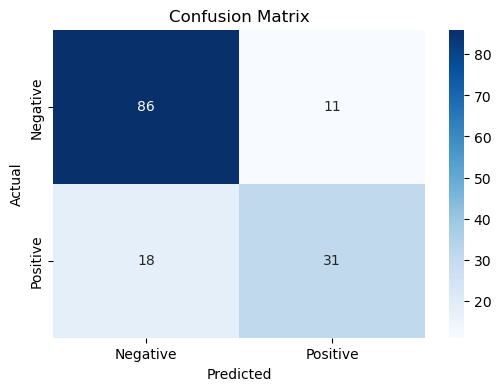

In [42]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Streamlit

In [83]:
import pickle
import os

# Define the save path
save_path = r"C:\Users\ts280\Documents\GitHub\Machine-Learning\TrainedModels"
os.makedirs(save_path, exist_ok=True)

# Save the trained model
model_filename = os.path.join(save_path, "diabetesmodel.pkl")
with open(model_filename, "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler
scaler_filename = os.path.join(save_path, "scaler.pkl")
with open(scaler_filename, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"Model saved successfully at: {model_filename}")
print(f"Scaler saved successfully at: {scaler_filename}")

Model saved successfully at: C:\Users\ts280\Documents\GitHub\Machine-Learning\TrainedModels\diabetesmodel.pkl
Scaler saved successfully at: C:\Users\ts280\Documents\GitHub\Machine-Learning\TrainedModels\scaler.pkl
